In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
bank_cust = pd.read_csv('bank_transactions.csv')
bank_cust.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
bank_cust.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [5]:
bank_eda = bank_cust.copy()

## Exploratory Data Analysis

### Any duplicated values?

In [6]:
bank_eda.duplicated().sum()

0

### Any NULL values?

In [7]:
null_values = bank_eda.isnull().sum()

In [8]:
null_values.values

array([   0,    0, 3397, 1100,  151, 2369,    0,    0,    0], dtype=int64)

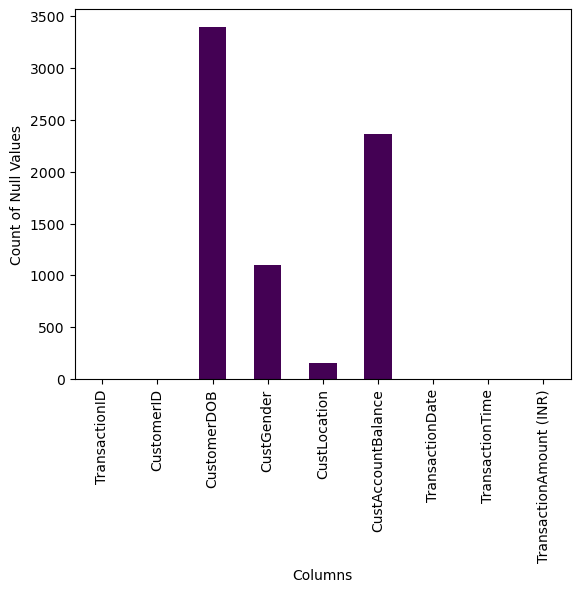

In [9]:
null_values.plot(kind='bar',cmap='viridis')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.show()

### Counts of Categorical values?

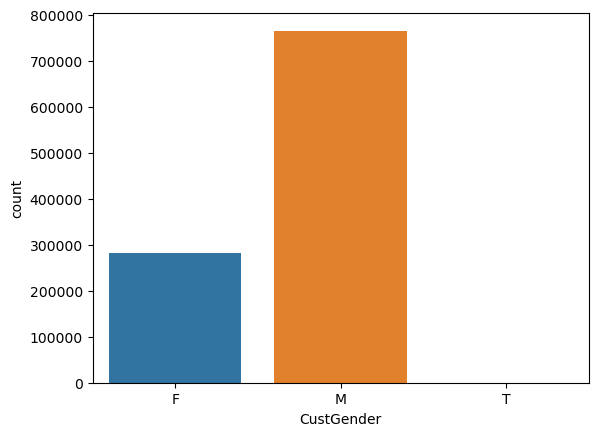

CustLocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: count, Length: 9355, dtype: int64


In [10]:
sns.countplot(data=bank_eda,x='CustGender')
plt.show()

print(bank_eda['CustLocation'].value_counts())

### Boxplot for Numerical Columns

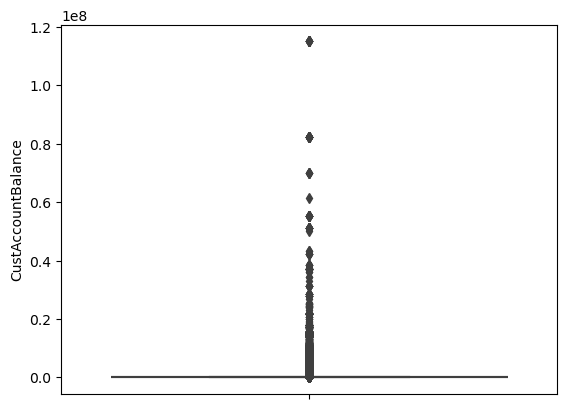

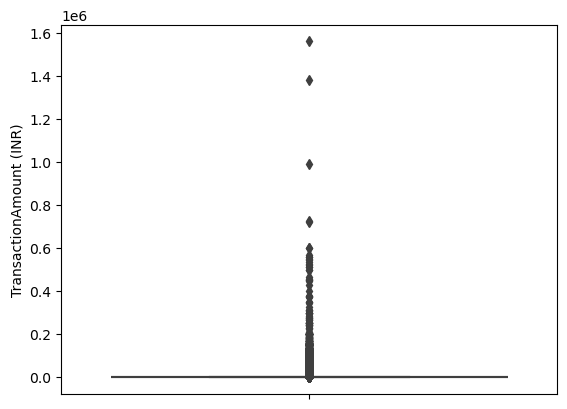

In [11]:
num_columns = ['CustAccountBalance','TransactionAmount (INR)']

for col in num_columns:
    sns.boxplot(data=bank_eda,y=col)
    plt.show()

### Boxplot of Account Balance and Transaction Amount by Gender

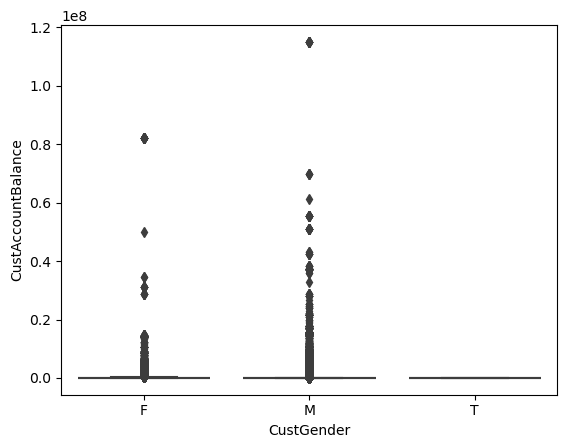

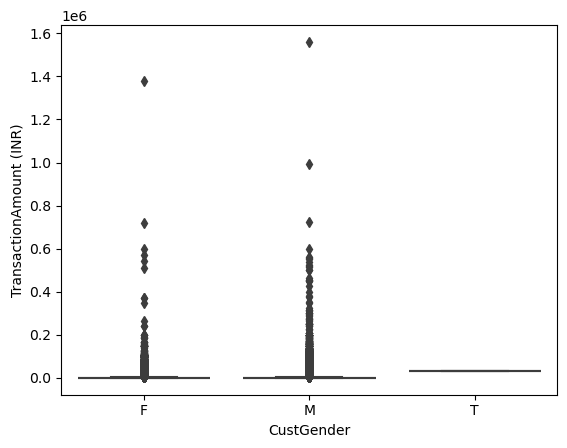

In [12]:
for col in num_columns:
    sns.boxplot(data=bank_eda,x='CustGender',y=col)
    plt.show()

In [13]:
(bank_eda['CustLocation'].value_counts()).sort_values(ascending=False).iloc[:10]

CustLocation
MUMBAI       103595
NEW DELHI     84928
BANGALORE     81555
GURGAON       73818
DELHI         71019
NOIDA         32784
CHENNAI       30009
PUNE          25851
HYDERABAD     23049
THANE         21505
Name: count, dtype: int64

### Year of Transaction and Customer Age as per Transaction Year

In [14]:
from datetime import datetime,date

bank_eda['TransactionDate'] = pd.to_datetime(bank_eda['TransactionDate'],format='mixed')
bank_eda['TransactionDate'] = bank_eda['TransactionDate'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

In [15]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [16]:
bank_eda['TransactionYear'] = bank_eda['TransactionDate'].dt.year
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016


In [17]:
bank_eda['CustomerDOB'] = pd.to_datetime(bank_eda['CustomerDOB'],format='mixed')
bank_eda['CustomerDOB'] = bank_eda['CustomerDOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)
bank_eda['CustomerYear'] = bank_eda['CustomerDOB'].dt.year
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0


In [18]:
bank_eda['CustomerAge'] = bank_eda['TransactionYear'] - bank_eda['CustomerYear']
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0,28.0


In [19]:
bank_eda[bank_eda.CustomerAge > 200]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,2016,1800.0,216.0
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,2016,1800.0,216.0
28,T29,C7935438,1800-01-01,M,MOHALI,969436.12,2016-03-08,183634,36.90,2016,1800.0,216.0
35,T36,C1211387,1800-01-01,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,2016,1800.0,216.0
151,T152,C3334638,1800-01-01,M,PUNE,700.00,2016-09-08,24912,1500.00,2016,1800.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,1800-01-01,M,BHILAI,1393.33,2016-09-18,102427,200.00,2016,1800.0,216.0
1048452,T1048453,C3813481,1800-01-01,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,2016,1800.0,216.0
1048531,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,2016,1800.0,216.0
1048533,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,2016,1800.0,216.0


### Outliers!?

In [20]:
bank_eda.drop('CustomerDOB',axis=1,inplace=True)

In [21]:
bank_eda.drop('CustomerYear',axis=1,inplace=True)

### Looks like there are Outliers

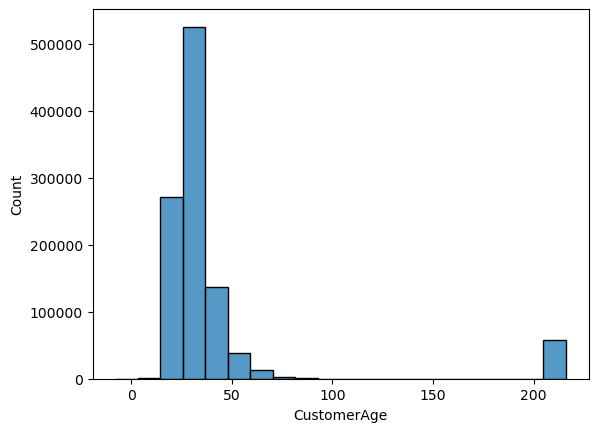

In [22]:
sns.histplot(data=bank_eda,x='CustomerAge',bins=20)
plt.show()

In [23]:
bank_eda[bank_eda.CustomerAge > 200]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
16,T17,C1376215,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,2016,216.0
22,T23,C7018081,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,2016,216.0
28,T29,C7935438,M,MOHALI,969436.12,2016-03-08,183634,36.90,2016,216.0
35,T36,C1211387,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,2016,216.0
151,T152,C3334638,M,PUNE,700.00,2016-09-08,24912,1500.00,2016,216.0
...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,M,BHILAI,1393.33,2016-09-18,102427,200.00,2016,216.0
1048452,T1048453,C3813481,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,2016,216.0
1048531,T1048532,C6937679,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,2016,216.0
1048533,T1048534,C7431884,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,2016,216.0


In [24]:
bank_clean = bank_eda[bank_eda.CustomerAge < 100]

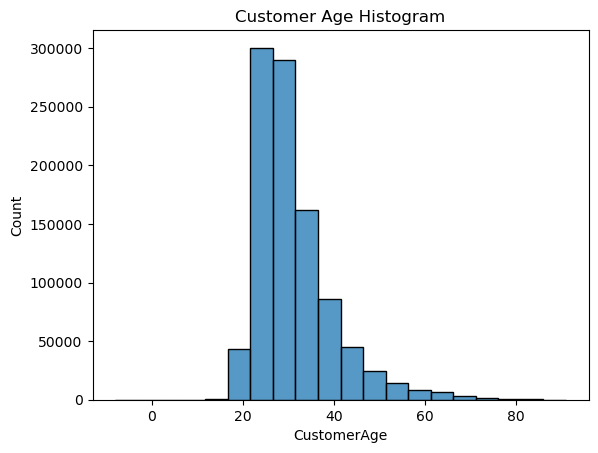

In [25]:
sns.histplot(data=bank_clean,x='CustomerAge',bins=20)
plt.title('Customer Age Histogram')
plt.show()

Majority customers are in the age group of 20-40

In [26]:
bank_clean.isna().sum()

TransactionID                 0
CustomerID                    0
CustGender                  164
CustLocation                151
CustAccountBalance         2194
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
TransactionYear               0
CustomerAge                   0
dtype: int64

### Checking if Account Balance > Transaction Amount

In [27]:
bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])<0]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,2016,59.0
26,T27,C5430368,M,DELHI,285.76,2016-03-08,160537,5500.00,2016,30.0
34,T35,C7017047,M,GURGAON,39.73,2016-03-08,182715,110.00,2016,39.0
36,T37,C4320949,F,CHENNAI,213.06,2016-03-08,182915,1081.00,2016,32.0
46,T47,C8934588,M,JAIPUR,5055.18,2016-03-08,223146,13846.00,2016,35.0
...,...,...,...,...,...,...,...,...,...,...
1048537,T1048538,C9016563,M,SHILLLONG,1002.96,2016-09-18,183747,1146.65,2016,29.0
1048538,T1048539,C3319123,M,DELHI,200.62,2016-09-18,183920,401.20,2016,37.0
1048542,T1048543,C6210667,M,MALDA,6.42,2016-09-18,182855,800.00,2016,27.0
1048560,T1048561,C5028150,M,PUNE,464.87,2016-09-18,184632,3000.00,2016,36.0


In [28]:
bank_clean_2 = bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])>0]

In [29]:
bank_clean_2.isna().sum()

TransactionID                0
CustomerID                   0
CustGender                 135
CustLocation               140
CustAccountBalance           0
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
TransactionYear              0
CustomerAge                  0
dtype: int64

In [30]:
bank_clean_2['CustGender'].fillna('M',inplace=True)
bank_clean_2['CustLocation'].fillna('MUMBAI',inplace=True)

In [31]:
bank_clean_2.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionYear            0
CustomerAge                0
dtype: int64

### Transactions Amount and Transaction Count by Month -2016

In [32]:
bank_clean_2['TransactionMonth'] = bank_clean_2['TransactionDate'].dt.month
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0,2
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0,2
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0,2
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,173940,676.0,2016,44.0,2


In [33]:
transactions_num = bank_clean_2[['TransactionAmount (INR)','TransactionMonth']]

In [34]:
monthly_transactions = transactions_num.groupby('TransactionMonth').agg(['median','count'])

In [35]:
monthly_transactions

TransactionAmount (INR)        
                                  median   count
TransactionMonth                                
1                                384.000   36129
2                                400.000   36994
3                                477.975   40108
4                                500.000   40644
5                                415.000   36124
6                                454.000   39217
7                                480.000   41656
8                                400.000  362838
9                                378.000  135155
10                               433.000   43455
11                               465.000   40296
12                               396.650   36204

### Median Transaction Amount by Month

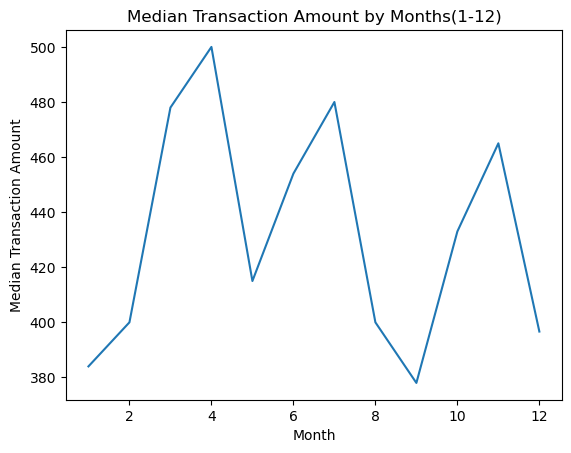

In [36]:
monthly_transactions['TransactionAmount (INR)','median'].plot(kind='line')
plt.title('Median Transaction Amount by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Median Transaction Amount')
plt.show()

### Number of Transactions by Month

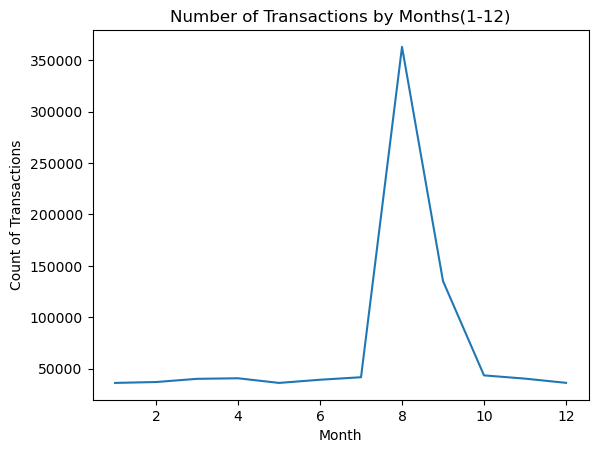

In [37]:
monthly_transactions['TransactionAmount (INR)','count'].plot(kind='line')
plt.title('Number of Transactions by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Count of Transactions')
plt.show()

### Transactions by Time of Day

In [38]:
bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

In [39]:
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,15:46:47,25.0,2016,22.0,2
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.0,2016,20.0,2
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.0,2016,43.0,2
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,02:19:16,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,00:19:00,676.0,2016,44.0,2


In [40]:
time_split = bank_clean_2['TransactionTime'].str.split(':',expand=True)
bank_clean_2['TransactionHour'] = time_split[0].astype(int)

In [41]:
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth,TransactionHour
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,15:46:47,25.0,2016,22.0,2,15
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.0,2016,20.0,2,15
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.0,2016,43.0,2,15
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,02:19:16,1762.5,2016,28.0,2,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,00:19:00,676.0,2016,44.0,2,0


In [42]:
transactions_num_2 = bank_clean_2[['TransactionAmount (INR)','TransactionHour']]

hourly_transactions = transactions_num_2.groupby('TransactionHour').agg(['median','count'])
hourly_transactions

TransactionAmount (INR)       
                                 median  count
TransactionHour                               
0                               450.000  41966
1                               251.000  21073
2                               425.000  52326
3                               435.000  37659
4                               306.000  32809
5                               456.000  60272
6                               418.130  36393
7                               408.000  49553
8                               480.000  58029
9                               400.000  32721
10                              450.000  61132
11                              410.000  40874
12                              404.625  30608
13                              400.000  52964
14                              340.000  25189
15                              440.000  37672
16                              405.000  36944
17                              365.000  22456
18                              490.000  34291
19                              383.000  14248
20                              389.280  25964
21                              500.000  33290
22                              289.465  12120
23                              400.000  38267

### Median Transaction Amount by Time of Day

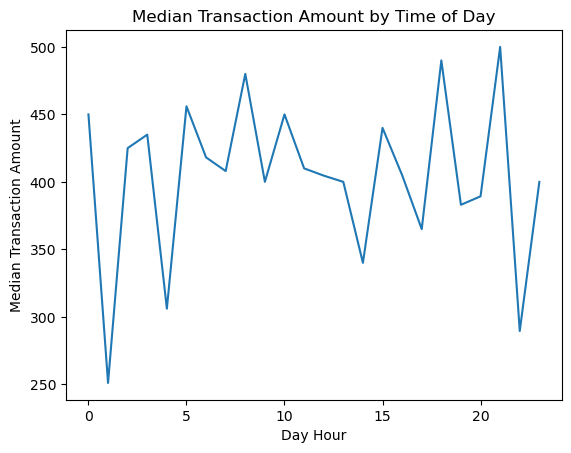

In [43]:
hourly_transactions['TransactionAmount (INR)','median'].plot(kind='line')
plt.title('Median Transaction Amount by Time of Day')
plt.xlabel('Day Hour')
plt.ylabel('Median Transaction Amount')
plt.show()

### Number of Transactions by Time of Day

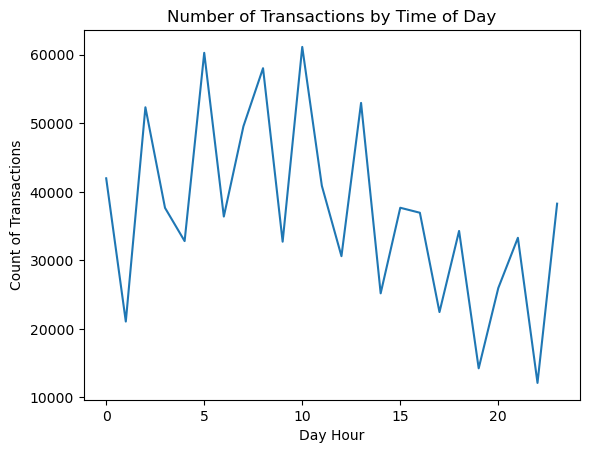

In [45]:
hourly_transactions['TransactionAmount (INR)','count'].plot(kind='line')
plt.title('Number of Transactions by Time of Day')
plt.xlabel('Day Hour')
plt.ylabel('Count of Transactions')
plt.show()

### Transactions by Month and Time of Day

In [46]:
transactions_3 = bank_clean_2[['TransactionAmount (INR)','TransactionMonth','TransactionHour']]

monthly_and_hourly = transactions_3.groupby(['TransactionMonth','TransactionHour']).agg(['median','count'])
monthly_and_hourly

TransactionAmount (INR)      
                                                  median count
TransactionMonth TransactionHour                              
1                0                               440.000  1473
                 1                               268.000   918
                 2                               398.430  2173
                 3                               409.000  1481
                 4                               286.000  1343
...                                                  ...   ...
12               19                              440.735   602
                 20                              300.000  1057
                 21                              420.000  1295
                 22                              240.000   513
                 23                              346.000  1645

[288 rows x 2 columns]

In [47]:
monthly_and_hourly.index

MultiIndex([( 1,  0),
            ( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ...
            (12, 14),
            (12, 15),
            (12, 16),
            (12, 17),
            (12, 18),
            (12, 19),
            (12, 20),
            (12, 21),
            (12, 22),
            (12, 23)],
           names=['TransactionMonth', 'TransactionHour'], length=288)

In [48]:
months = list(range(1,13))
hours = list(range(0,24))
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Median Transaction Amount in Every Month and Time of Day

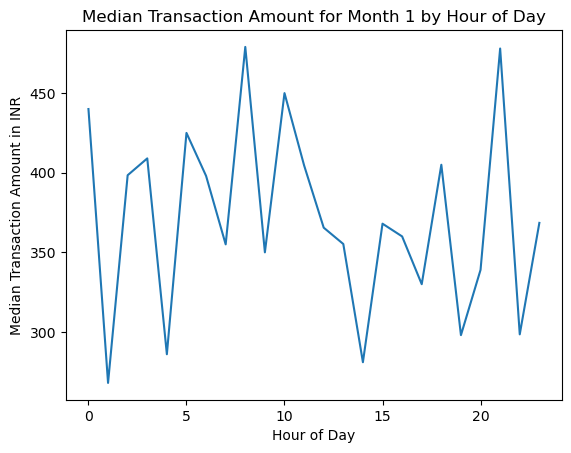

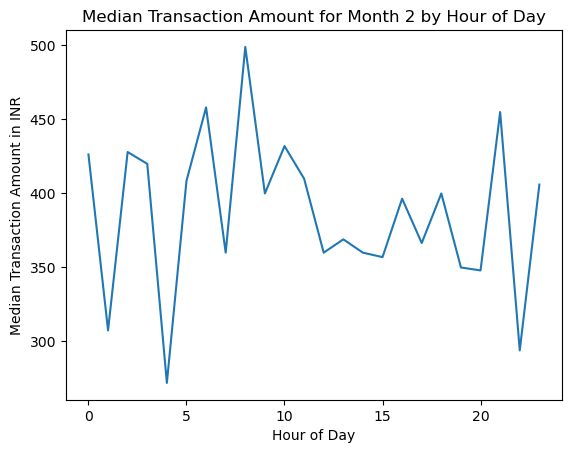

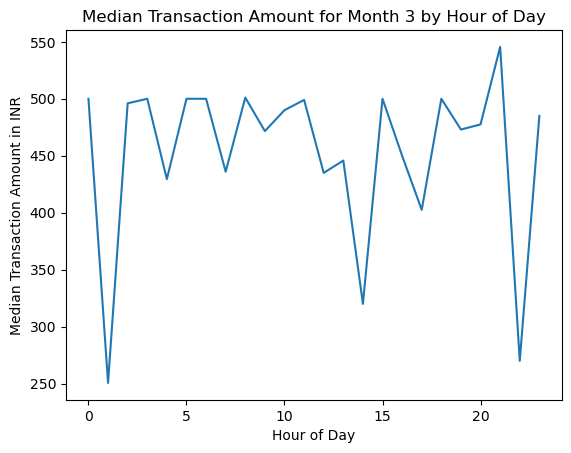

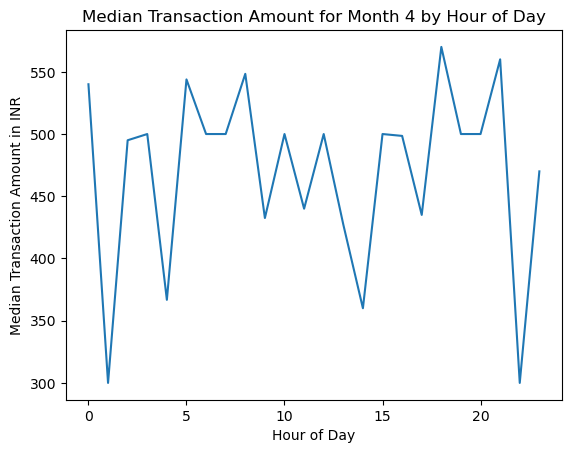

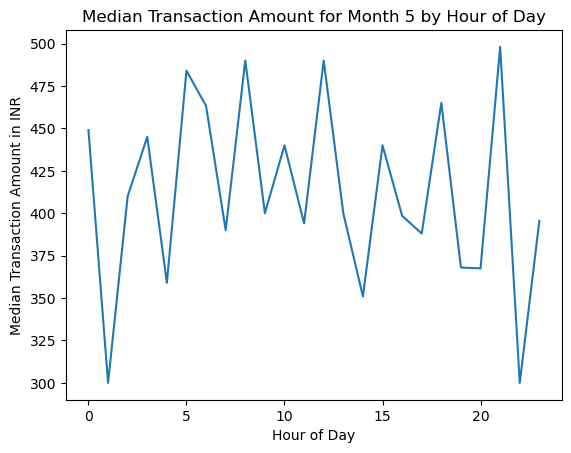

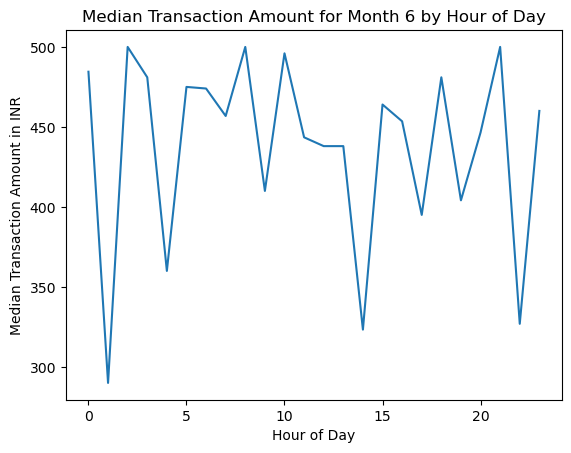

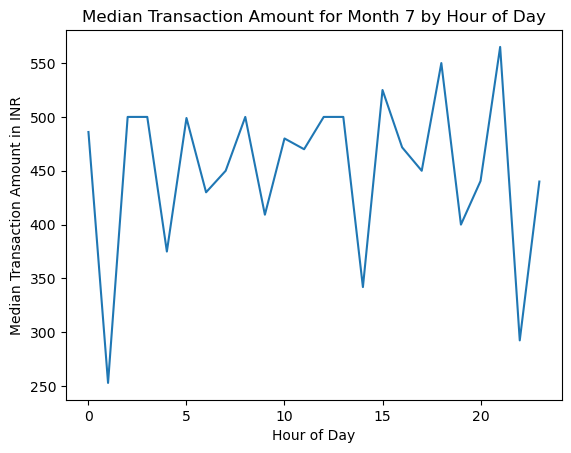

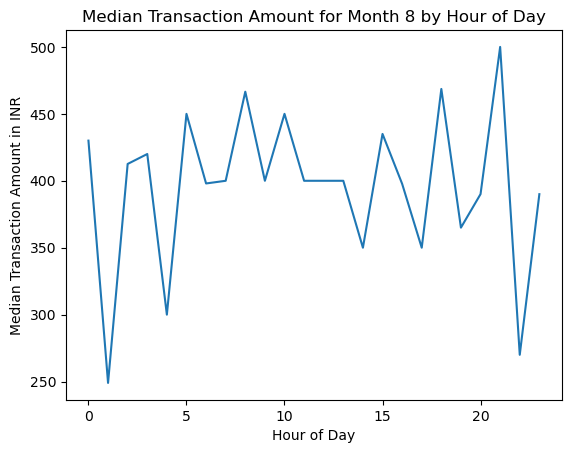

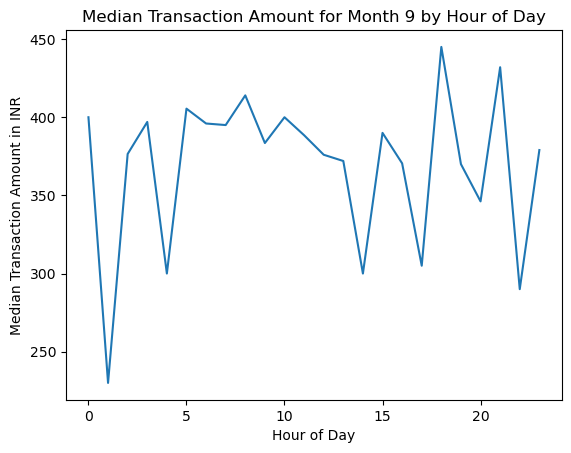

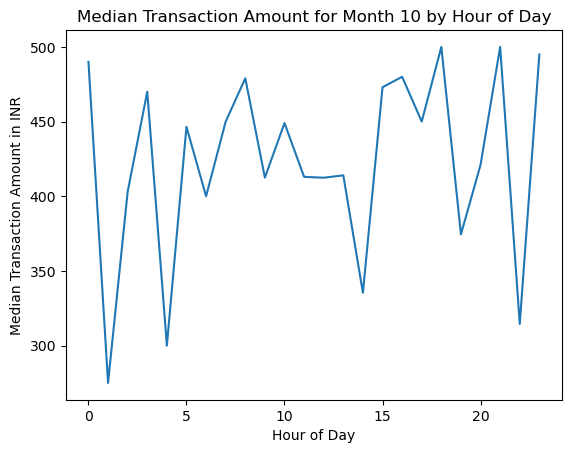

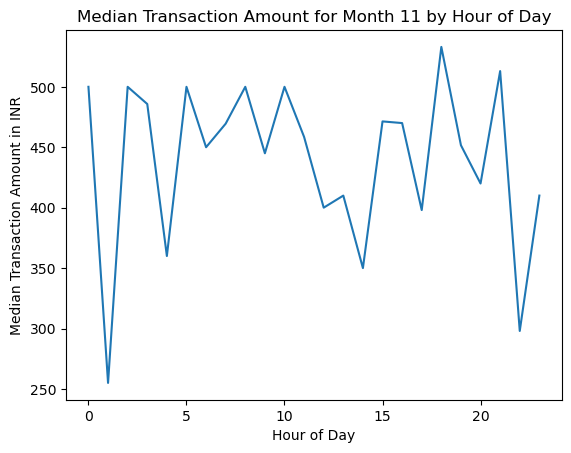

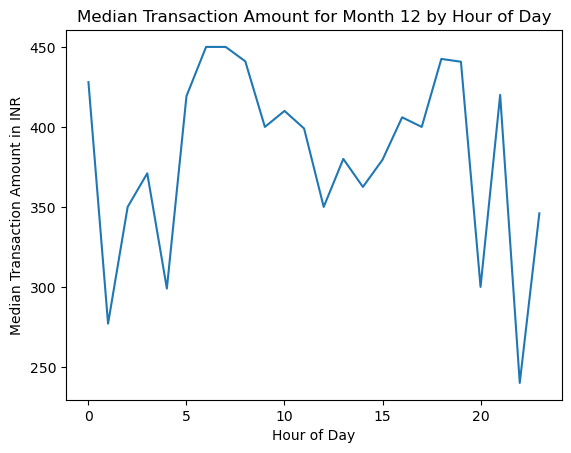

In [49]:
for month in months:
    mini_month = monthly_and_hourly.loc[month]
    mini_month['TransactionAmount (INR)','median'].plot(kind='line')
    plt.title(f'Median Transaction Amount for Month {month} by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Median Transaction Amount in INR')
    plt.show()

### Number of Transactions for Every Month and Time of Day

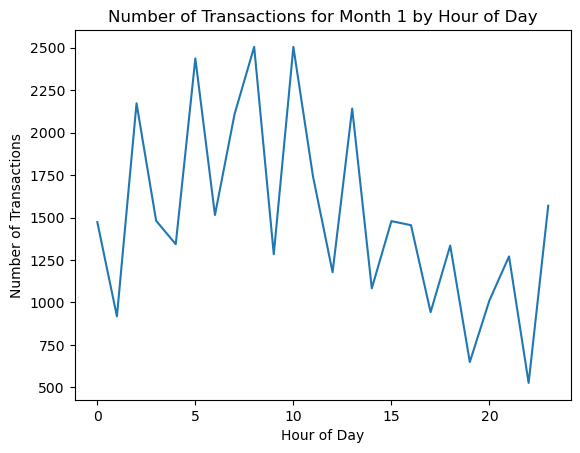

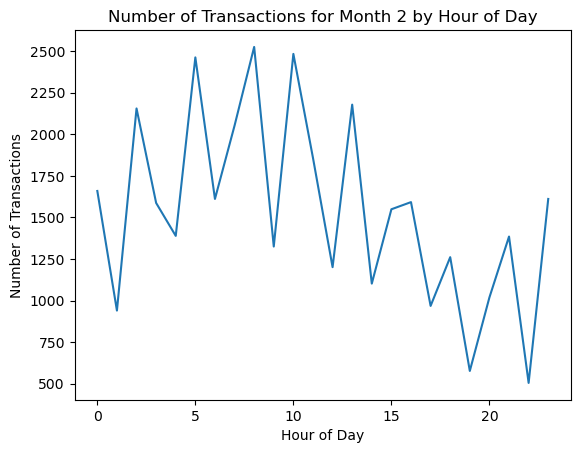

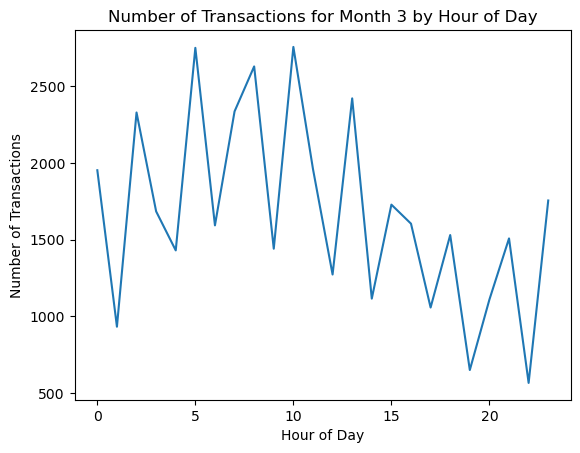

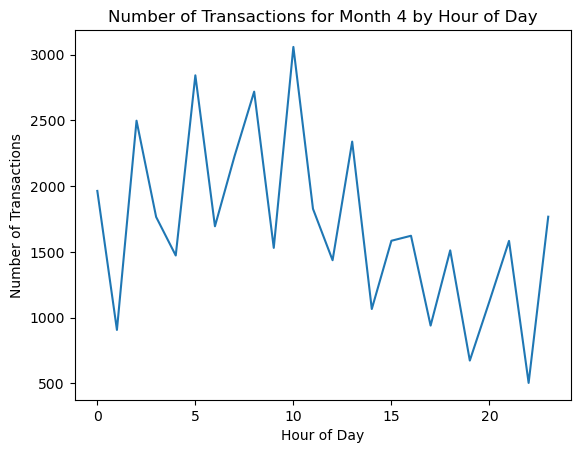

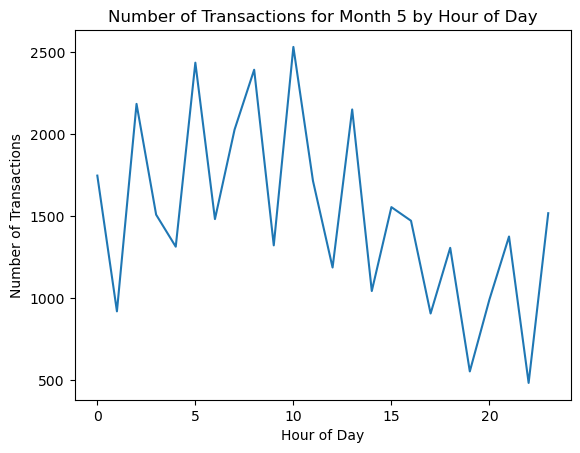

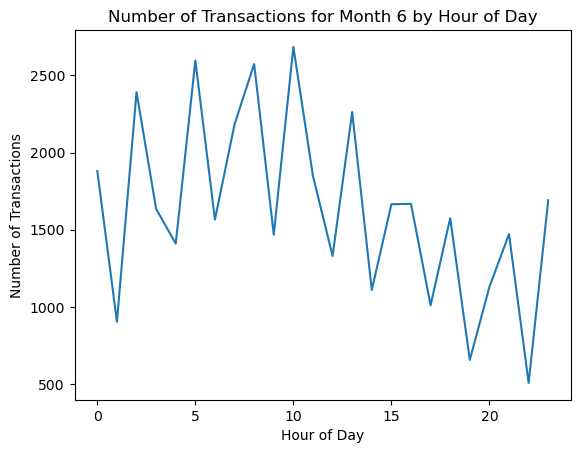

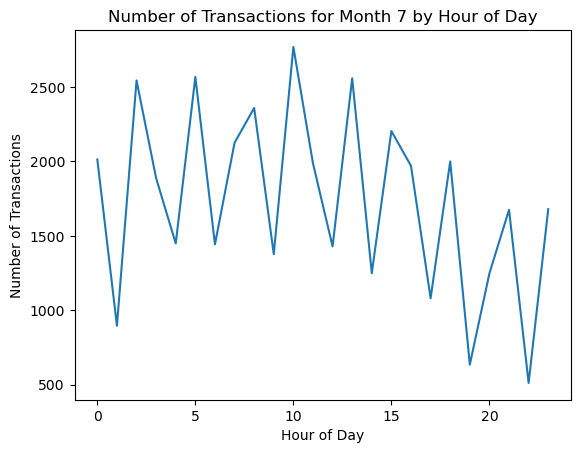

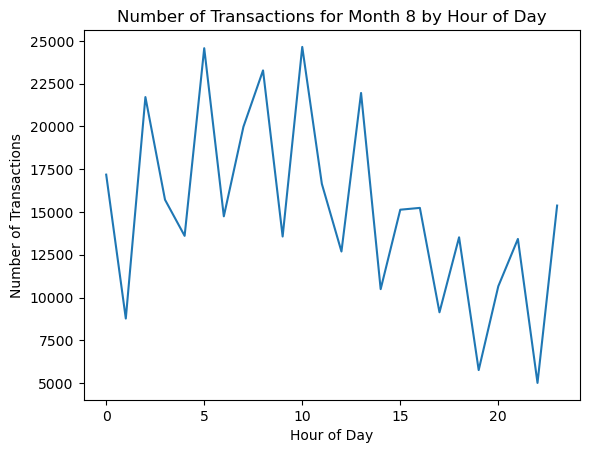

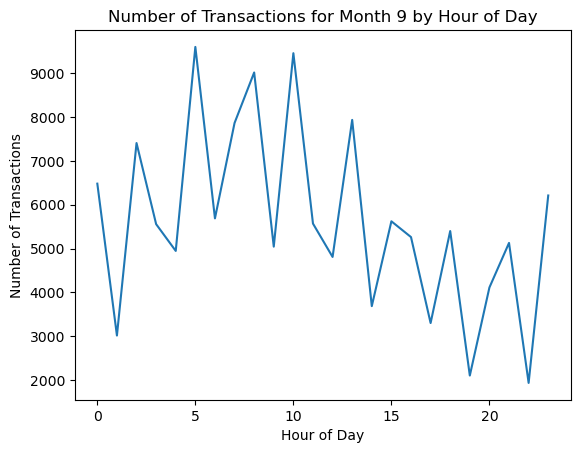

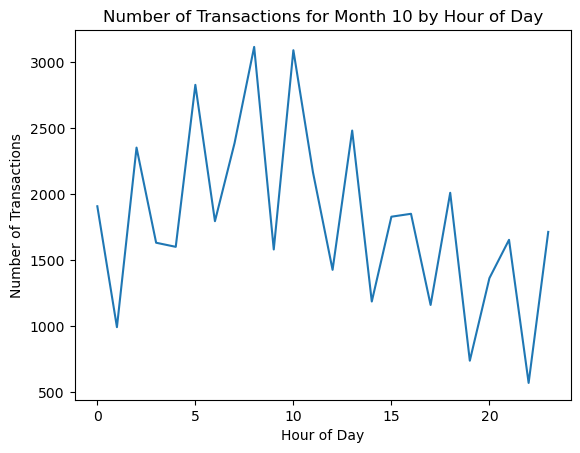

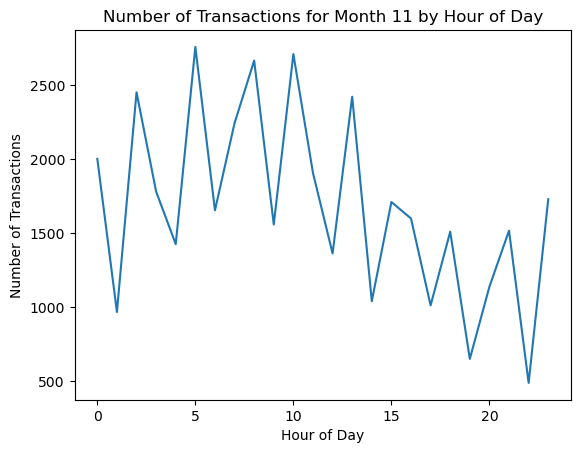

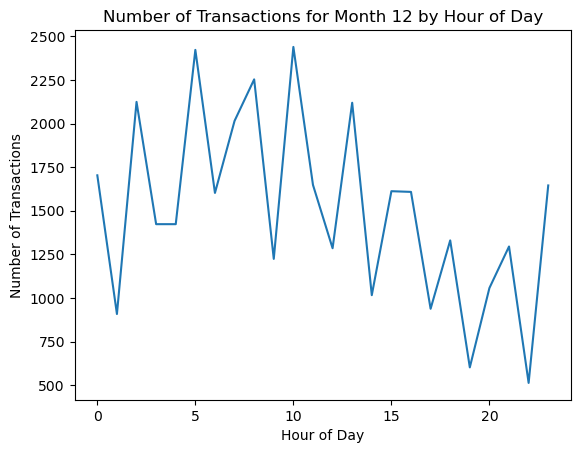

In [50]:
for month in months:
    mini_month = monthly_and_hourly.loc[month]
    mini_month['TransactionAmount (INR)','count'].plot(kind='line')
    plt.title(f'Number of Transactions for Month {month} by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Transactions')
    plt.show()

### Correlation between Numerical Features

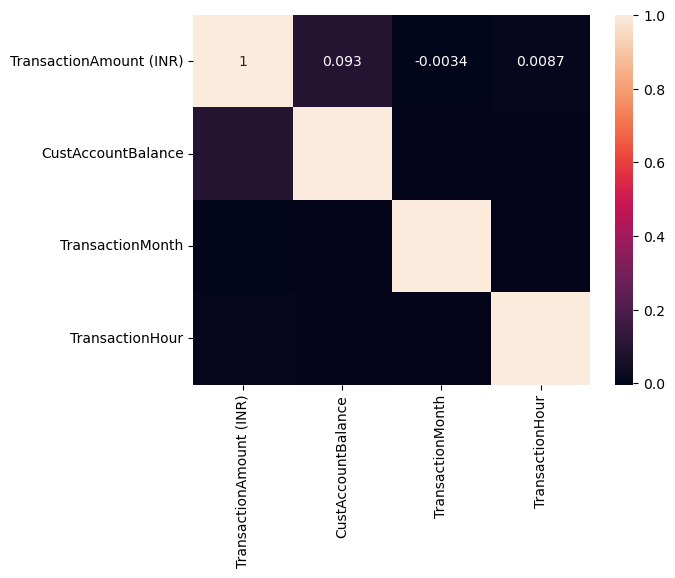

In [51]:
transactions_corr = bank_clean_2[['TransactionAmount (INR)','CustAccountBalance','TransactionMonth','TransactionHour']]

corr_mat = transactions_corr.corr()

sns.heatmap(corr_mat,annot=True)
plt.show()

## Principal Component Analysis

In [52]:
bank = bank_clean_2.copy()
bank.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth,TransactionHour
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,15:46:47,25.0,2016,22.0,2,15
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.0,2016,20.0,2,15
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.0,2016,43.0,2,15
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,02:19:16,1762.5,2016,28.0,2,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,00:19:00,676.0,2016,44.0,2,0


In [53]:
bank.drop(['TransactionID','CustomerID','CustLocation','TransactionDate','TransactionTime','TransactionYear'],axis=1,inplace=True)

In [54]:
bank.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionMonth,TransactionHour
0,F,17819.05,25.0,22.0,2,15
2,F,17874.44,459.0,20.0,2,15
3,F,866503.21,2060.0,43.0,2,15
4,F,6714.43,1762.5,28.0,2,2
5,F,53609.20,676.0,44.0,2,0


In [55]:
bank.drop(['TransactionMonth','TransactionHour'],axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())
num_attribs = ['CustAccountBalance','TransactionAmount (INR)','CustomerAge']
cat_attribs = ['CustGender']
preprocessing = ColumnTransformer([
    ('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs)
])

In [57]:
bank_df = preprocessing.fit_transform(bank)

In [58]:
print('Shape of Bank data before PCA:',bank_df.shape)

Shape of Bank data before PCA: (888820, 5)


In [59]:
from sklearn.decomposition import TruncatedSVD

pca_bank = TruncatedSVD(n_components=4)
pca_bank.fit(bank_df)

bank_transformed = pca_bank.transform(bank_df)
print('Shape of Bank data after PCA:',bank_transformed.shape)

Shape of Bank data after PCA: (888820, 4)


### Plot of Principal Component-2 vs Principal Component-1

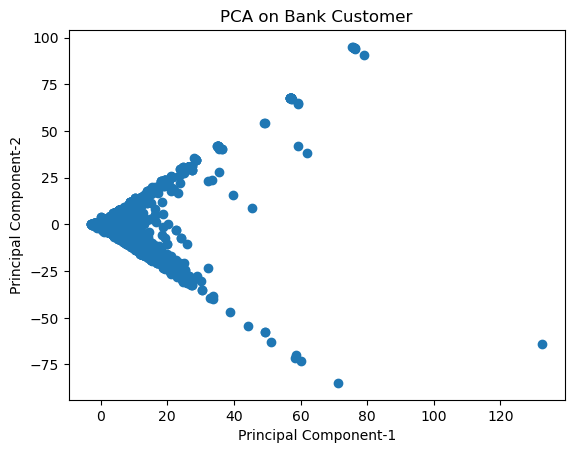

In [60]:
plt.scatter(bank_transformed[:,0],bank_transformed[:,1])
plt.title('PCA on Bank Customer')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [61]:
from sklearn.cluster import KMeans

cluster = list(range(1,21))
inertias = []
for clusters in cluster:
    kmeans_bank = KMeans(n_clusters=clusters,n_init='auto',random_state=42)
    kmeans_bank.fit(bank_transformed)
    inertias.append(kmeans_bank.inertia_)

### Knee-Elbow Plot

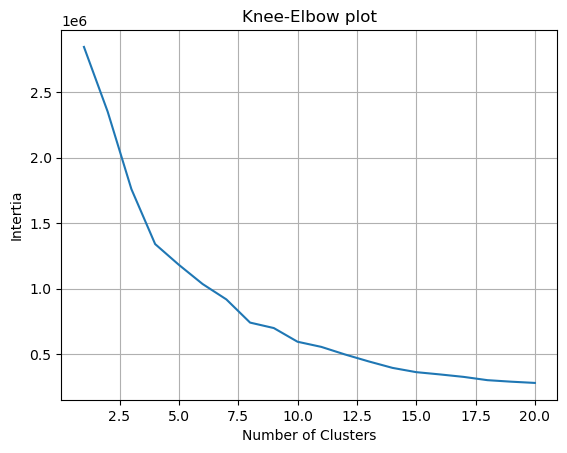

In [62]:
plt.plot(cluster,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.title('Knee-Elbow plot')
plt.grid()
plt.show()

### Principal Components Plot with Labels

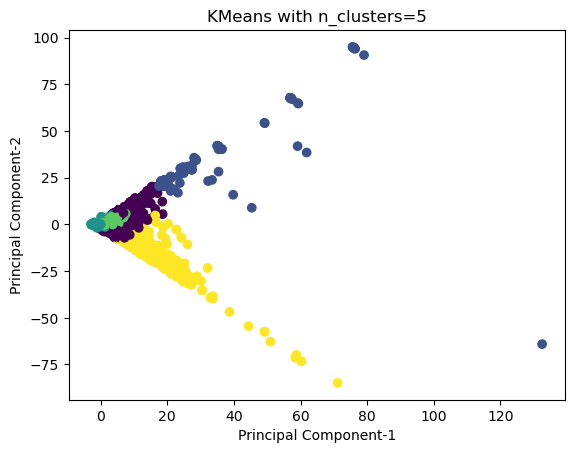

In [63]:
kmeans_chosen = KMeans(n_clusters=5,n_init='auto',random_state=42)
kmeans_chosen.fit(bank_transformed)

plt.scatter(bank_transformed[:,0],bank_transformed[:,1],c=kmeans_chosen.labels_)
plt.title('KMeans with n_clusters=5')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [64]:
bank['Labels'] = kmeans_chosen.labels_

In [65]:
bank['Labels'].value_counts()

Labels
2    700766
3    173251
0     13352
4      1291
1       160
Name: count, dtype: int64

### Summary Statistics of Clusters

In [66]:
labels = [0,1,2,3,4]
for label in labels:
    print(f'Cluster no:{label}')
    df_cluster = bank[bank.Labels == label]
    mode_gender = df_cluster['CustGender'].mode()
    mean_accountbalance = df_cluster['CustAccountBalance'].mean()
    mean_transaction_amt = df_cluster['TransactionAmount (INR)'].mean()
    mean_customer_age = df_cluster['CustomerAge'].mean()
    print(f'Most frequent gender:{mode_gender}')
    print(f'Mean Account Balance:{round(mean_accountbalance)}')
    print(f'Mean Transaction Amount (INR):{round(mean_transaction_amt)}')
    print(f'Mean Customer Age:{round(mean_customer_age)}')

Cluster no:0
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:1173587
Mean Transaction Amount (INR):17674
Mean Customer Age:37
Cluster no:1
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:47811714
Mean Transaction Amount (INR):12343
Mean Customer Age:59
Cluster no:2
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:62532
Mean Transaction Amount (INR):775
Mean Customer Age:28
Cluster no:3
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:208864
Mean Transaction Amount (INR):1418
Mean Customer Age:45
Cluster no:4
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:851395
Mean Transaction Amount (INR):79649
Mean Customer Age:40


1. Cluster 0 : Middle Aged Males who are probably working professionals 
2. Cluster 1: Senior Males who are well established with a high Account Balance
3. Cluster 2: Single Males who are starting out their careers with a relatively low Bank Balance and Transaction Amount
4. Cluster 3: Similar characteristics to Cluster 0
5. Cluster 4: Simialr characteristics to Cluster 0